In [0]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout,MaxPool2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [0]:
((trainX,trainY),(testX,testY))=datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
print(trainX.shape)

(60000, 28, 28)


In [0]:
trainX = trainX.reshape(trainX.shape[0],28,28,1)
testX = testX.reshape(testX.shape[0],28,28,1)
print(trainX.shape)
print(testX.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
print(trainY[:10])
trainY = np_utils.to_categorical(trainY,10)
testY = np_utils.to_categorical(testY,10)
print(trainY[:10])

[9 0 0 3 0 2 7 2 5 5]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [0]:
IMG_HEIGHT = 28
IMG_WIDTH = 28
channels = 1
classes = 10
init_lr = 1e-2
batch_size = 32
input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)
labelNames = ["top", "trouser", "pullover", "dress", "coat","sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [0]:
num_epochs=25

In [0]:
model= Sequential()
model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape= input_shape))
model.add(Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512 ,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(classes, activation="softmax"))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [0]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy,metrics=['accuracy'])

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

In [0]:
history = model.fit(trainX, trainY,validation_data=(testX, testY),batch_size=batch_size, epochs= num_epochs)

Epoch 1/25
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4311 - accuracy: 0.8420 - val_loss: 0.2876 - val_accuracy: 0.8943
Epoch 2/25
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2815 - accuracy: 0.8962 - val_loss: 0.2378 - val_accuracy: 0.9080
Epoch 3/25
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2439 - accuracy: 0.9100 - val_loss: 0.2259 - val_accuracy: 0.9160
Epoch 4/25
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2234 - accuracy: 0.9184 - val_loss: 0.2079 - val_accuracy: 0.9222
Epoch 5/25
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2085 - accuracy: 0.9229 - val_loss: 0.2167 - val_accuracy: 0.9223
Epoch 6/25
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1933 - accuracy: 0.9272 - val_loss: 0.2024 - val_accuracy: 0.9267
Epoch 7/25
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1860 - accuracy: 0.9304 - val_loss: 0.2014 - val_

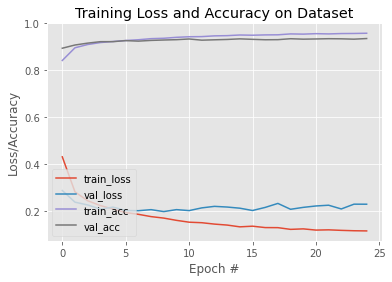

In [0]:
N = num_epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [0]:
preds= model.predict(testX)

In [0]:
print(preds[:3])

In [0]:
print(preds.argmax(axis=1))

In [0]:
print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1),target_names=labelNames))

              precision    recall  f1-score   support

         top       0.88      0.89      0.89      1000
     trouser       1.00      0.99      0.99      1000
    pullover       0.91      0.90      0.91      1000
       dress       0.93      0.96      0.95      1000
        coat       0.89      0.91      0.90      1000
      sandal       0.99      0.99      0.99      1000
       shirt       0.82      0.78      0.80      1000
     sneaker       0.97      0.98      0.97      1000
         bag       0.99      0.99      0.99      1000
  ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

